In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap


In [14]:
class Perceptron:
    def __init__(self,eta: float= None, epochs: int= None):
        self.weights = np.random.randn(3) * 1e-4  ### small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training :  \n{self.weights}")
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self,inputs,weights):
        return np.dot(inputs,weights)
        
    def activation_function(self,z):
        return np.where(z>0,1,0)
    
    def fit(self, X,y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X with bias :\n {X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*13)
            print(f"for epoch >> {epoch+1}")
            print("--"*13)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass : \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error : \n{self.error}")
            
            self.weights = self.weights + self.eta*np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch : {epoch+1}/{self.epochs}: \n {self.weights}")
            print("##"*13)
        
        
    def prediction(self,test_inputs):
        X_with_bias = np.c_[test_inputs, -np.ones((len(test_inputs),1))]
        z = self._z_outcome(X_with_bias,self.weights)
        return self.activation_function(z)

    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"total loss : {total_loss}\n")
    
    def _create_dir_return_path(self,model_dir,filename):
        os.makedirs(model_dir,exist_ok=True)
        return os.path.join(model_dir,filename)
    
    def save(self, filenamem, model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir,filenamem)
            joblib.dump(self, model_file_path)
        
        else:
            model_file_path = self._create_dir_return_path("model",filenamem)
            joblib.dump(self, model_file_path)
        
    
    def load(self,filepath):
        return joblib.load(filepath)
    

In [15]:
def prepare_data(df,target_col="y"):
    X= df.drop(target_col,axis =1)
    y =df[target_col]
    
    return X,y

In [57]:
def save_plot(df,model,fielname = "plot.png", plot_dir = "plots"):
    def _create_base_plot(df):
        df.plot(kind= "scatter", x = "X1",y = "X2",c = "y",s = 100,cmap = "coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure  =plt.gcf()
        figure.set_size_inches(10,8)
    
    def _plot_decision_region(X,y,classifier,resolution = 0.02):
        colors=("cyan","lightgreen")
        cmap = ListedColormap(colors)
        
        X= X.values
        x1= X[:,0]
        x2 = X[:,1]
        
        x1_min , x1_max = x1.min()- 1,x1.max()+1
        x2_min , x2_max = x2.min()- 1,x2.max()+1
        
        xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                             np.arange(x2_min,x2_max,resolution ))
        y_hat = classifier.prediction(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1,xx2,y_hat,alpha= 0.3,cmap = cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(),xx2.max())
        
        plt.plot()
        
    
    X,y = prepare_data(df)
    _create_base_plot(df)
    _plot_decision_region(X,y,model)
    
    os.makedirs(plot_dir,exist_ok=True)
    plot_path = os.path.join(plot_dir,fielname)
    plt.savefig(plot_path)

In [68]:
AND = {
    "X1": [0,0,1,1],
    "X2": [0,1,0,1],
    "y" : [0,0,0,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [69]:
X,y = prepare_data(df_AND)
ETA = 0.1 
EPOCHs = 10
model_and = Perceptron(eta = ETA, epochs=EPOCHs)
model_and.fit(X,y)
_ = model_and.total_loss()


initial weights before training :  
[-1.50042021e-05 -7.32778531e-05 -1.64630511e-04]
X with bias :
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------------
for epoch >> 1
--------------------------
predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch : 1/10: 
 [-0.100015   -0.10007328  0.29983537]
##########################
--------------------------
for epoch >> 2
--------------------------
predicted value after forward pass : 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch : 2/10: 
 [-1.50042021e-05 -7.32778531e-05  1.99835369e-01]
##########################
--------------------------
for epoch >> 3
--------------------------
predicted value after forward pass : 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch : 3/10: 
 [0.099985   0.09992672 0.09983537]
###################

In [18]:
XOR = {
    "X1": [0,0,1,1],
    "X2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [19]:
X,y = prepare_data(df_XOR)
ETA = 0.1 
EPOCHs = 10
model_and = Perceptron(eta = ETA, epochs=EPOCHs)
model_and.fit(X,y)
_ = model_and.total_loss()


initial weights before training :  
[ 7.18712704e-06 -6.47944153e-06 -8.28453416e-05]
X with bias :
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------------
for epoch >> 1
--------------------------
predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch : 1/10: 
 [-0.09999281 -0.10000648  0.19991715]
##########################
--------------------------
for epoch >> 2
--------------------------
predicted value after forward pass : 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch : 2/10: 
 [ 7.18712704e-06 -6.47944153e-06 -8.28453416e-05]
##########################
--------------------------
for epoch >> 3
--------------------------
predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch : 3/10: 
 [-0.09999281 -0.10000648  0.19991715]
################

In [61]:
OR = {
    "X1": [0,0,1,1],
    "X2": [0,1,0,1],
    "y" : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [64]:
X,y = prepare_data(df_OR)
ETA = 0.1 
EPOCHs = 10
model_or = Perceptron(eta = ETA, epochs=EPOCHs)
model_or.fit(X,y)
_ = model_and.total_loss()


initial weights before training :  
[ 9.67577573e-06 -6.63492173e-05 -2.69098997e-05]
X with bias :
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------------
for epoch >> 1
--------------------------
predicted value after forward pass : 
[1 0 1 0]
error : 
0   -1
1    1
2    0
3    1
Name: y, dtype: int64
updated weights after epoch : 1/10: 
 [ 0.10000968  0.19993365 -0.10002691]
##########################
--------------------------
for epoch >> 2
--------------------------
predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 2/10: 
 [ 1.00009676e-01  1.99933651e-01 -2.69098997e-05]
##########################
--------------------------
for epoch >> 3
--------------------------
predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 3/10: 
 [0.10000968 0.19993365 0.09997309]
###################

In [70]:
model_and.save("model_and.model")

In [71]:
load_and_model = Perceptron().load(filepath="model/model_and.model")
load_and_model.prediction([[0,1],[0,0],[1,0],[1,1]])

array([0, 0, 0, 1])

In [65]:
model_or.save("model_or.model")

In [66]:
load_or_model = Perceptron().load(filepath="model/model_or.model")
load_or_model.prediction([[0,1],[0,0],[1,0],[1,1]])

array([1, 0, 1, 1])

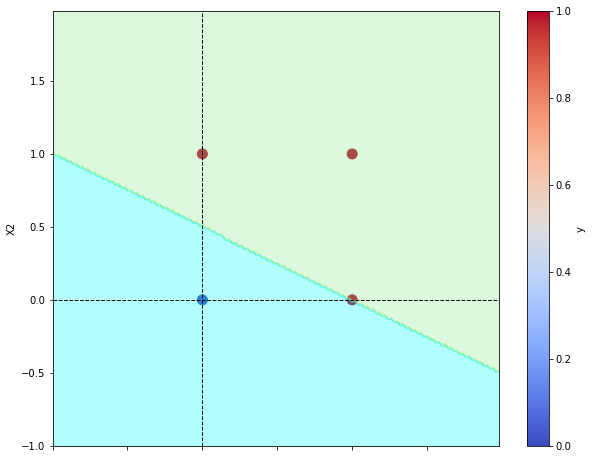

In [74]:
save_plot(df_OR,model_or,fielname= "or.png")

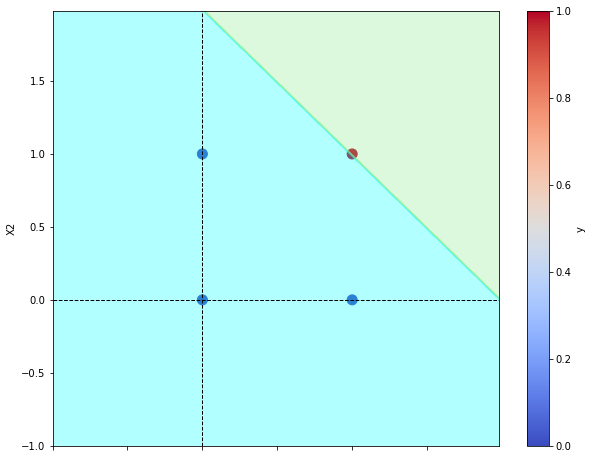

In [73]:
save_plot(df_AND,model_and,fielname= "and.png")